In [ ]:
# Dataset download path = "https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf"

# 1. Importing Required Libraries

In [14]:
# Importing essential libraries for deep learning and image processing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


# 2. Dataset Path and Configuration


In [8]:
# Path to the dataset directory
train_dir = 'C:\\Users\\iamma\\Downloads\\archive\\tomato\\train'  # Replace with the actual path to the training folder
val_dir = 'C:\\Users\\iamma\\Downloads\\archive\\tomato\\val'      # Replace with the actual path to the validation folder

# Configuration settings for the model
batch_size = 32                            # Number of images to process at once
img_height, img_width = 128, 128           # Dimensions to resize images
epochs = 15                                # Number of epochs for training


# 3. Data Preprocessing and Augmentation

In [9]:
# Data Augmentation and Preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values
    rotation_range=20,          # Randomly rotate images
    width_shift_range=0.2,      # Shift images horizontally
    height_shift_range=0.2,     # Shift images vertically
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Randomly zoom in/out
    horizontal_flip=True,       # Flip images horizontally
    fill_mode='nearest'         # Fill in new pixels
)

# Data Preprocessing for validation data (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_gen = train_datagen.flow_from_directory(
    train_dir,                  # Path to training directory
    target_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,
    class_mode='categorical',   # Multi-class classification
    shuffle=True                # Shuffle the data
)

# Validation data generator
val_gen = val_datagen.flow_from_directory(
    val_dir,                    # Path to validation directory
    target_size=(img_height, img_width),  # Resize images
    batch_size=batch_size,
    class_mode='categorical',   # Multi-class classification
    shuffle=False               # Do not shuffle the data
)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


# 4. Building the CNN Model

In [11]:
# Building the Convolutional Neural Network (CNN) model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the layers
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(train_gen.num_classes, activation='softmax')  # Output layer for multi-class classification
])


# 5. Compiling the Model


In [12]:
# Compiling the model with appropriate loss function and optimizer
model.compile(
    optimizer='adam',  # Adam optimizer for adaptive learning
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metric for evaluating the model's performance
)


# 6. Training the Model


In [13]:
# Training the model with the training and validation data
history = model.fit(
    train_gen,                        # Training data generator
    validation_data=val_gen,          # Validation data generator
    epochs=epochs,                    # Number of epochs to train
    steps_per_epoch=train_gen.samples // batch_size,  # Number of steps per epoch
    validation_steps=val_gen.samples // batch_size   # Validation steps
)


Epoch 1/15
312/312 [==============================] - 236s 750ms/step - loss: 1.7131 - accuracy: 0.3781 - val_loss: 1.2004 - val_accuracy: 0.5988
Epoch 2/15
312/312 [==============================] - 169s 542ms/step - loss: 1.1596 - accuracy: 0.5974 - val_loss: 0.8858 - val_accuracy: 0.6925
Epoch 3/15
312/312 [==============================] - 153s 491ms/step - loss: 0.9396 - accuracy: 0.6671 - val_loss: 0.9843 - val_accuracy: 0.6724
Epoch 4/15
312/312 [==============================] - 160s 510ms/step - loss: 0.8224 - accuracy: 0.7068 - val_loss: 0.5876 - val_accuracy: 0.7984
Epoch 5/15
312/312 [==============================] - 176s 562ms/step - loss: 0.7205 - accuracy: 0.7463 - val_loss: 0.8214 - val_accuracy: 0.7288
Epoch 6/15
312/312 [==============================] - 197s 632ms/step - loss: 0.6826 - accuracy: 0.7588 - val_loss: 0.8334 - val_accuracy: 0.7087
Epoch 7/15
312/312 [==============================] - 175s 559ms/step - loss: 0.6042 - accuracy: 0.7918 - val_loss: 0.6541 -

# 7. Saving the Model


In [ ]:
# Save the trained model to a file for future use
model.save('tomato_leaf_disease_model.h5')


# 8. Visualizing Training Progress


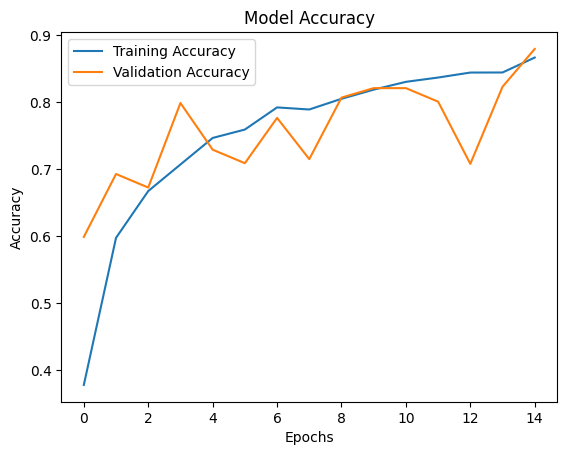

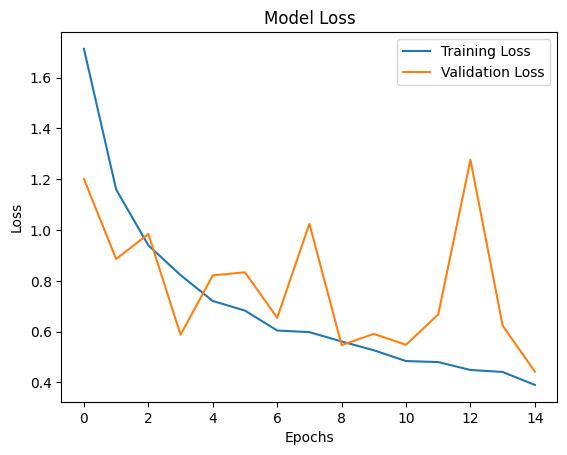

In [15]:
# Plotting the accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 9. Making Predictions on New Images

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_labels = list(train_gen.class_indices.keys())

    # Return the class label
    return class_labels[predicted_class]

# Example usage
img_path = 'C:\\Users\\iamma\\Downloads\\archive\\tomato\\val\\Tomato___Target_Spot\\0b6c4305-0cdc-4150-914b-5d7a5acb7881___Com.G_TgS_FL 8257.jpg'  # Replace with the path to your test image
predicted_label = predict_image(img_path)
print(f'The predicted class is: {predicted_label}')


1/1 [==============================] - 0s 27ms/step
The predicted class is: Tomato___Target_Spot
